# **Project:** 금융파생상품의 시장 움직임 이해

> **"금융시장의 움직임을 이해하는 것은 `금융시장을 이해하는 것`과 같다    
따라서 금융시장 대표적인 상품인 `주식을 포함하여 파생상품 선물과 옵션`의 움직임을 이해하는 것이 목적이다    
궁극적으로 `4가지 금융상품의 데이터의 이론가격들을 생성`하고 `움직임을 이해하기 위한 통계량을 확인`하면서 프로젝트를 완성한다"**


1. **데이터 로딩:** 아래 내용을 반영한 `S, F, C, P 라는 이름의 DataFrame 변수`에 데이터를 생성한다

    - `주식, 선물, 옵션`의 가격 데이터를 생성
    - 각 상품은 `일별 데이터`로 `약 2년치(252일/1년)` Samples 생성
    > - 선물의 `단기 금리(r)는 5%`, `배당수익율(d)은 4.5%`로 반영
    > - 옵션은 콜옵션과 풋옵션 모두 생성하고 `현재가(K)는 1원`, `금리(r)는 5%`, `변동성은 2.5%`로 반영
    - 각 상품 별 `1000개의 종목 데이터 생성`
    > - 선물과 옵션의 움직임은 생성한 주식 가격 데이터를 입력받아 연관되어 움직여야 함
    - 서로 연관되어 움직이는 `주식/선물/콜옵션/풋옵션 각각 1000개 종목 2년치` DataFrame 생성
    > - 전체 총 `4개의 DataFrame이 생성`되고, `각각의 shape과 첫 5개의 데이터`를 출력
    
---

2. **데이터 시각화:** 각 데이터의 `Histogram & Box Plot`을 시각화하여 정규분포와 어떻게 다른지 확인한다

    - 상품의 각 종목별 1000개의 시각화가 아닌 `각 상품별 1000개 종목 구분없이 모든 값을 포함`
    - 시각화에 사용하는 라이브러리는 `Pandas 또는 Matplotlib`
    - `주식과 선물을 묶어서` 1개의 히스토그램 + `콜옵션과 풋옵션을 묶어서` 1개의 히스토그램을 시각화하여 `상품들의 분포를 비교`
    - 박스플랏은 `4개 상품을 묶어서` 1개로 시각화하여 `상품들의 분포와 Outlier를 비교`
    - 전체 총 `2개의 히스토그램 + 1개의 박스플랏`
    > - 히스토그램의 `x축 구간은 30개`로, `density 형태`로, `투명도를 50%`로, `label은 각 상품명`으로 반영
    > - 박스플랏에는 `x축 이름을 Financial Markets`로, `x축의 tick들은 각 상품명`으로 반영
    
---

3. **데이터 통계량**: 각 데이터의 `통계량을 확인`하여 어떤 차이가 있는지 확인한다

    - 상품의 각 종목별 1000개의 통계량이 아닌 `각 상품별 1000개 종목 구분없이 모든 값을 포함`하여 계산
    - 각 상품별 `평균, 중앙값, 분산, 왜도, 첨도`를 계산
    - 4개의 상품의 통계량들을 붙여서 `1개의 DataFrame`으로 표현
    > - index 이름은 ['Stock', 'Future', 'Call', 'Put']
    > - column 이름은 ['Mean', 'Median', 'Variance', 'Skewness', 'Kurtosis']
    - 5개의 통계량 각각에 대해 `가장 수치가 큰 상품명을 출력`
    
---

4. **상관분석:** 상관관계와 시각화를 활용하여 `상품들의 관련성 확인`하기

    - 각 상품의 상관성을 확인하기 위해 `상품들의 상관관계` 파악
    > - `주식과 선물, 콜옵션, 풋옵션의 3가지 상관관계`를 출력
    > - 상관관계 `수치가 가장 높은 상품명` 출력
    - 콜옵션과 풋옵션을 종속변수로 주식을 독립변수로 활용하여 `관련성을 시각화`
    > - `총 2개의 시각화` 출력하며 `seaborn 라이브러리`를 사용
    > - 콜옵션과 풋옵션의 `Pay-off 구조`를 간접적으로 확인 가능

# 금융상품 움직임 분석

## **Data Loading:** 분석에 사용할 데이터 불러오기

In [26]:
import numpy as np
import pandas as pd
from scipy.stats import norm

np.random.seed(42)
n_days = 504  # 2년치 일수
n_assets = 1000  # 종목 수

# 주식 데이터 생성
# 각 종목별로 누적 합계를 계산하기 위해 axis=0을 사용
start_prices = np.random.uniform(1, 10, n_assets)
S = pd.DataFrame(np.random.normal(0.001, 0.02, (n_days, n_assets)).cumsum(axis=0) + 100, 
                 columns=[f'Stock_{i}' for i in range(1, n_assets + 1)]) + start_prices

# 선물 데이터 생성
r, d = 0.05, 0.045  # 단기 금리 및 배당수익율
F = S * np.exp((r - d) * 1)  # 1년 만기 가정

# 옵션 데이터 생성 (블랙-숄즈 모델 사용)
K, T, sigma = 1, 1, 0.025  # 실행 가격, 만기까지 시간(년), 변동성
d1 = (np.log(S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# 콜옵션 및 풋옵션 가격
C = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
P = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

# 결과 출력
print("주식 DataFrame(S)의 shape:", S.shape)
print(S.head())
print("\n선물 DataFrame(F)의 shape:", F.shape)
print(F.head())
print("\n콜옵션 DataFrame(C)의 shape:", C.shape)
print(C.head())
print("\n풋옵션 DataFrame(P)의 shape:", P.shape)
print(P.head())


주식 DataFrame(S)의 shape: (504, 1000)
      Stock_1     Stock_2     Stock_3     Stock_4     Stock_5     Stock_6  \
0  104.375415  109.530722  107.596549  106.401138  102.416364  102.426566   
1  104.348289  109.530060  107.567455  106.417339  102.419012  102.398415   
2  104.366779  109.518064  107.544391  106.397498  102.410268  102.392377   
3  104.364773  109.512531  107.524539  106.375054  102.420556  102.382366   
4  104.371354  109.519362  107.491726  106.356484  102.476660  102.377254   

      Stock_7     Stock_8     Stock_9    Stock_10  ...   Stock_991  \
0  101.540431  108.805769  106.409632  107.340434  ...  108.196615   
1  101.535247  108.791726  106.417015  107.368243  ...  108.193498   
2  101.520847  108.766803  106.408893  107.372872  ...  108.214534   
3  101.528174  108.750098  106.413514  107.399937  ...  108.215838   
4  101.543793  108.738085  106.372708  107.397532  ...  108.254607   

    Stock_992   Stock_993   Stock_994   Stock_995   Stock_996   Stock_997  \
0  

## **Data Visualization:** 데이터를 시각화하기

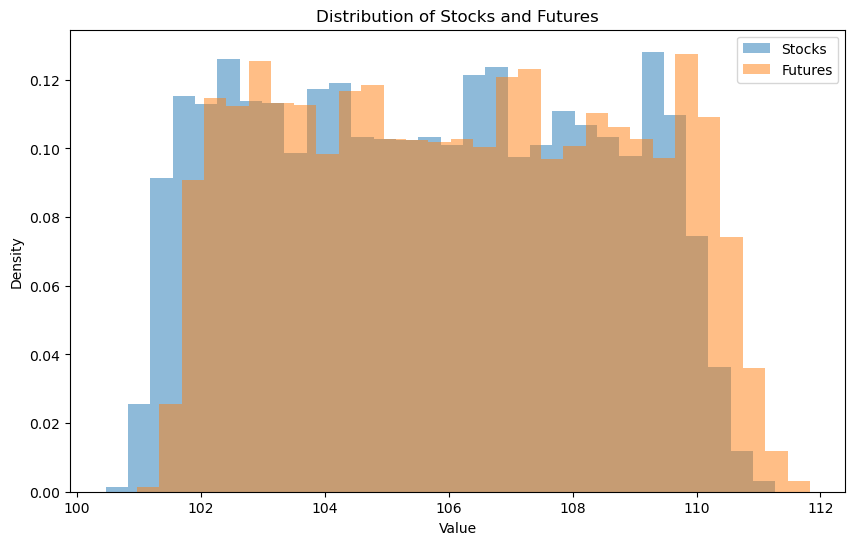

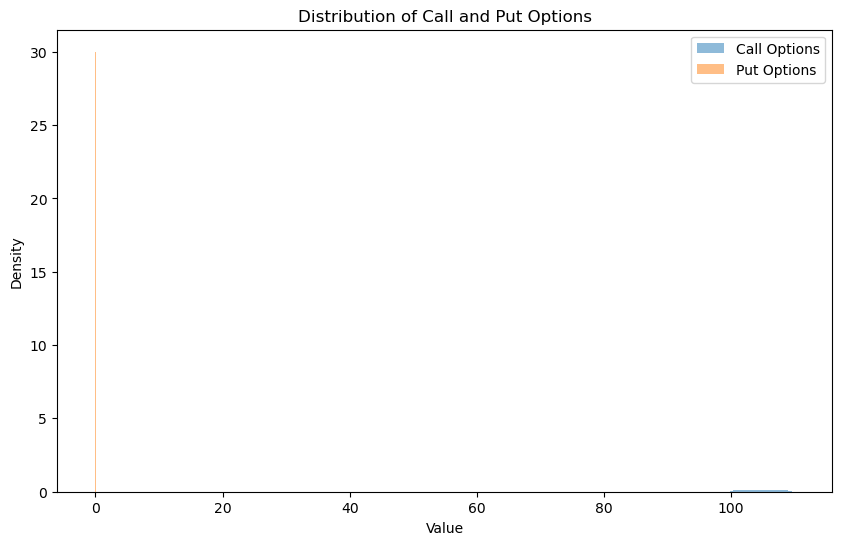

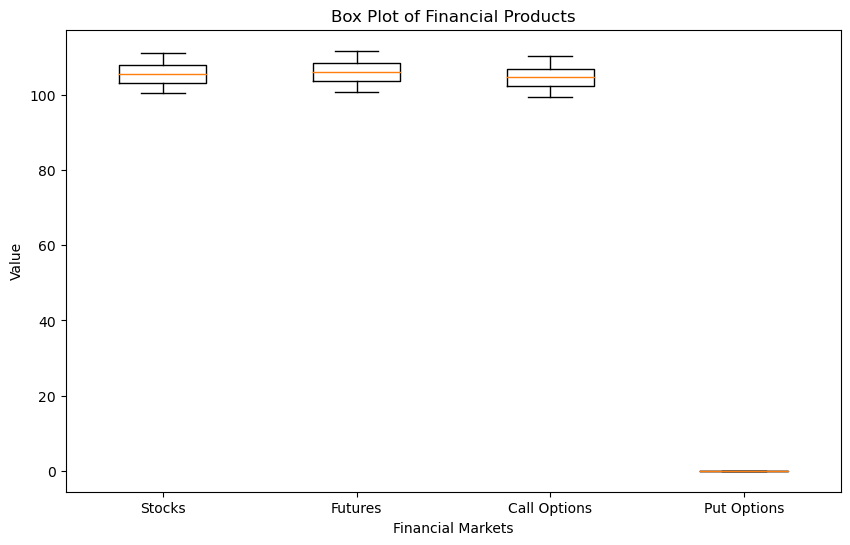

In [27]:
import matplotlib.pyplot as plt

# 주식과 선물 데이터를 하나로 묶어서 히스토그램 생성
plt.figure(figsize=(10, 6))
plt.hist(S.values.flatten(), bins=30, alpha=0.5, label='Stocks', density=True)
plt.hist(F.values.flatten(), bins=30, alpha=0.5, label='Futures', density=True)
plt.title('Distribution of Stocks and Futures')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

# 콜옵션과 풋옵션 데이터를 하나로 묶어서 히스토그램 생성
plt.figure(figsize=(10, 6))
plt.hist(C.values.flatten(), bins=30, alpha=0.5, label='Call Options', density=True)
plt.hist(P.values.flatten(), bins=30, alpha=0.5, label='Put Options', density=True)
plt.title('Distribution of Call and Put Options')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

# 모든 상품 데이터를 포함하는 박스플롯 생성
plt.figure(figsize=(10, 6))
all_data = [S.values.flatten(), F.values.flatten(), C.values.flatten(), P.values.flatten()]
plt.boxplot(all_data, labels=['Stocks', 'Futures', 'Call Options', 'Put Options'])
plt.title('Box Plot of Financial Products')
plt.xlabel('Financial Markets')
plt.ylabel('Value')
plt.show()

## **Data Description:** 데이터의 통계량 확인하기

In [28]:
import pandas as pd
from scipy import stats

# 각 상품별로 모든 값들을 포함하여 통계량 계산
statistics = {
    'Stock': {
        'Mean': S.values.flatten().mean(),
        'Median': np.median(S.values.flatten()),
        'Variance': S.values.flatten().var(),
        'Skewness': stats.skew(S.values.flatten()),
        'Kurtosis': stats.kurtosis(S.values.flatten())
    },
    'Future': {
        'Mean': F.values.flatten().mean(),
        'Median': np.median(F.values.flatten()),
        'Variance': F.values.flatten().var(),
        'Skewness': stats.skew(F.values.flatten()),
        'Kurtosis': stats.kurtosis(F.values.flatten())
    },
    'Call': {
        'Mean': C.values.flatten().mean(),
        'Median': np.median(C.values.flatten()),
        'Variance': C.values.flatten().var(),
        'Skewness': stats.skew(C.values.flatten()),
        'Kurtosis': stats.kurtosis(C.values.flatten())
    },
    'Put': {
        'Mean': P.values.flatten().mean(),
        'Median': np.median(P.values.flatten()),
        'Variance': P.values.flatten().var(),
        'Skewness': stats.skew(P.values.flatten()),
        'Kurtosis': stats.kurtosis(P.values.flatten())
    }
}

# 통계량 DataFrame 생성
stats_df = pd.DataFrame(statistics).T
stats_df.index.name = 'Product'
stats_df.columns = ['Mean', 'Median', 'Variance', 'Skewness', 'Kurtosis']
print(stats_df)

# 5개의 통계량 각각에 대해 가장 수치가 큰 상품명 출력
max_values = stats_df.idxmax()
print("\nMax values:")
print(max_values)


               Mean      Median  Variance  Skewness  Kurtosis
Product                                                      
Stock    105.664631  105.675358  7.078063  0.035606 -1.193574
Future   106.194278  106.205058  7.149198  0.035606 -1.193574
Call     104.713402  104.724129  7.078063  0.035606 -1.193574
Put        0.000000    0.000000  0.000000       NaN       NaN

Max values:
Mean        Future
Median      Future
Variance    Future
Skewness      Call
Kurtosis      Call
dtype: object


## **Relation:** 데이터의 관련성 확인하기

In [29]:
#상관관계 계산 및 출력
import seaborn as sns
import matplotlib.pyplot as plt

# 상품별 평균 가격 계산
average_prices = {
    'Stock': S.mean(axis=1),
    'Future': F.mean(axis=1),
    'Call': C.mean(axis=1),
    'Put': P.mean(axis=1)
}

# 평균 가격을 DataFrame으로 변환
average_prices_df = pd.DataFrame(average_prices)

# 상관관계 계산
correlations = average_prices_df.corr()

# 주식과 다른 상품들 간의 상관관계 출력
print("Correlations with Stock:")
print(correlations['Stock'])

# 상관관계 수치가 가장 높은 상품명 출력
highest_correlation = correlations['Stock'].drop('Stock').idxmax()
print(f"Highest correlation with Stock is with {highest_correlation}: {correlations['Stock'][highest_correlation]}")


Correlations with Stock:
Stock     1.0
Future    1.0
Call      1.0
Put       NaN
Name: Stock, dtype: float64
Highest correlation with Stock is with Future: 1.0000000000000007


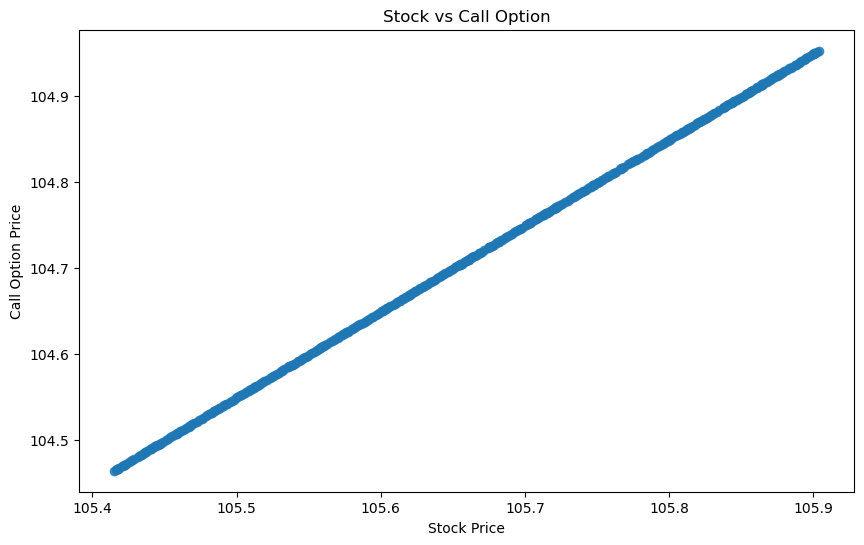

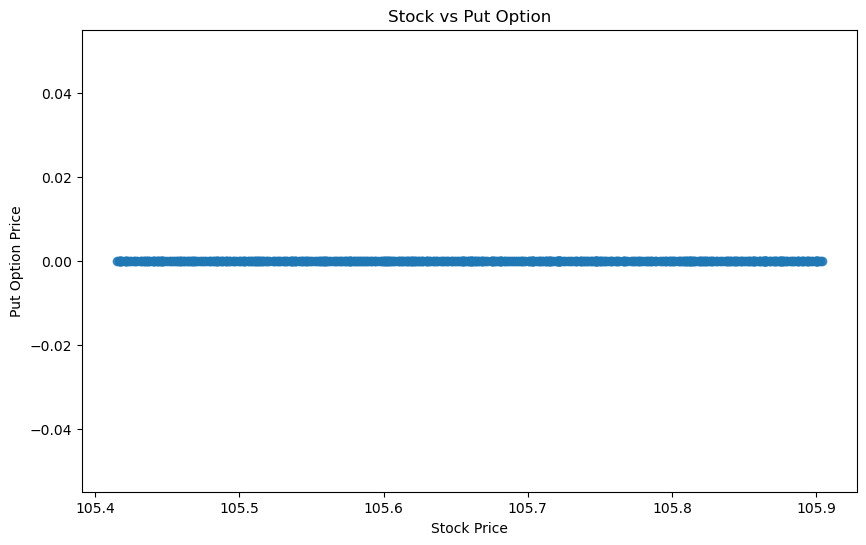

In [30]:
# 주식 가격과 콜옵션 가격의 관련성 시각화
plt.figure(figsize=(10, 6))
sns.regplot(x=S.mean(axis=1), y=C.mean(axis=1))
plt.title('Stock vs Call Option')
plt.xlabel('Stock Price')
plt.ylabel('Call Option Price')
plt.show()

# 주식 가격과 풋옵션 가격의 관련성 시각화
plt.figure(figsize=(10, 6))
sns.regplot(x=S.mean(axis=1), y=P.mean(axis=1))
plt.title('Stock vs Put Option')
plt.xlabel('Stock Price')
plt.ylabel('Put Option Price')
plt.show()
